### Team ID   <font color=black>        : C7</font>
### Sem         : <font color=black> 5</font> 
### Div           : <font color=black> C</font>
### School: <font color=black>School Of Computer Science And Engineering </font> 
###   Topic ID   : <font color=black> 5DMACP08</font>
###    Project Title:  <font color=black>Building Insurance Claim Prediction</font>
###   Problem Statement: <font color=black>Predict if a building will have an insurance claim during a certain period. </font>   
###    Team Details :
###    Team Leader :
###  <font color=black>Nisha Rao         -146-    01FE17BCS123</font>
###    Members:
###  <font color=black>Prajwal Nazre     -157-    01FE17BCS134</font> 
### <font color=black>Pratiksha Danti    -162-    01FE17BCS139</font>
### <font color=black>Rachana Udagatti   -167-    01FE17BCS145</font>

### Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import datetime
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from scipy import stats
from mlxtend.preprocessing import minmax_scaling

### Input data

In [2]:
# Loading the train datasets
train_datax=pd.read_csv('/home/ubuntu/Desktop/DMA Project/x_train.csv')
train_datax.drop('Index',axis=1,inplace=True)
train_datax

,login,ft_2_categ,EXPO,ft_4_categ,ft_5_categ,ft_6_categ,ft_7_categ,ft_8_categ,ft_9_categ,ft_10_categ,...,ft_16_categ,ft_17_categ,ft_18_categ,ft_19_categ,superficief,ft_21_categ,ft_22_categ,ft_23_categ,ft_24_categ,Insee
0,18702,2014,1.000000,0,V,NOT,1,O,1,O,...,IDENTICAL,V,based,2,1351.0,4,2012.0,0,2,65440
1,3877,2014,1.000000,0,V,V,V,V,V,V,...,V,NOT,based,2,1972.0,2,1980.0,0,0,14341
2,4942,2013,1.000000,1,V,V,V,V,V,V,...,V,NOT,based,2,1630.0,4,NaN,0,0,75109
3,13428,2013,0.246575,0,NOT,V,V,V,V,V,...,V,NOT,based,2,532.0,3,NaN,0,0,92004
4,17137,2015,1.000000,0,V,NOT,2,O,1,O,...,IDENTICAL,V,based,2,1050.0,2,1972.0,0,4,59340
5,7580,2016,1.000000,1,NOT,V,V,V,V,V,...,V,NOT,based,2,2039.0,2,1960.0,0,0,13206
6,11501,2015,1.000000,0,NOT,V,V,V,V,V,...,V,NOT,based,2,750.0,1,1960.0,0,0,33015
7,9102,2016,0.997268,1,NOT,V,V,V,V,V,...,V,NOT,based,2,570.0,3,NaN,0,0,59350
8,11999,2016,0.997268,0,NOT,V,V,V,V,V,...,V,NOT,based,2,835.0,1,1980.0,0,0,88383
9,9772,2013,1.000000,0,V,NOT,1,O,1,O,...,IDENTICAL,V,based,2,1015.0,2,1972.0,0.3,3,83061


In [3]:
train_datax['ft_5_categ'].replace('N','NOT',inplace=True)
train_datax['ft_6_categ'].replace('N','NOT',inplace=True)
train_datax['ft_8_categ'].replace('N','NOT',inplace=True)
train_datax['ft_10_categ'].replace('N','NOT',inplace=True)
train_datax['ft_11_categ'].replace('N','NOT',inplace=True)
train_datax['ft_12_categ'].replace('N','NOT',inplace=True)
train_datax['ft_13_categ'].replace('N','NOT',inplace=True)
train_datax['ft_14_categ'].replace('N','NOT',inplace=True)
train_datax['ft_17_categ'].replace('N','NOT',inplace=True)

### External Data

In [4]:
lat_long=pd.read_csv('/home/ubuntu/Desktop/DMA Project/latlong.csv')
lat_long

,EU_circo,code_région,nom_région,chef.lieu_région,numéro_département,nom_département,préfecture,numéro_circonscription,nom_commune,codes_postaux,Insee,latitude,longitude,éloignement
0,Sud-Est,82,Rhône-Alpes,Lyon,1,Ain,Bourg-en-Bresse,1,Attignat,1340,1024,46.283333,5.166667,1.21
1,Sud-Est,82,Rhône-Alpes,Lyon,1,Ain,Bourg-en-Bresse,1,Beaupont,1270,1029,46.400000,5.266667,1.91
2,Sud-Est,82,Rhône-Alpes,Lyon,1,Ain,Bourg-en-Bresse,1,Bény,1370,1038,46.333333,5.283333,1.51
3,Sud-Est,82,Rhône-Alpes,Lyon,1,Ain,Bourg-en-Bresse,1,Béreyziat,1340,1040,46.366667,5.05,1.71
4,Sud-Est,82,Rhône-Alpes,Lyon,1,Ain,Bourg-en-Bresse,1,Bohas-Meyriat-Rignat,1250,1245,46.133333,5.4,1.01
5,Sud-Est,82,Rhône-Alpes,Lyon,1,Ain,Bourg-en-Bresse,1,Bourg-en-Bresse,1000,1053,46.200000,5.216667,1.00
6,Sud-Est,82,Rhône-Alpes,Lyon,1,Ain,Bourg-en-Bresse,1,Buellas,1310,1065,46.200000,5.133333,0.73
7,Sud-Est,82,Rhône-Alpes,Lyon,1,Ain,Bourg-en-Bresse,1,Certines,1240,1069,46.133333,5.266667,1.97
8,Sud-Est,82,Rhône-Alpes,Lyon,1,Ain,Bourg-en-Bresse,1,Ceyzériat,1250,1072,46.166667,5.316667,1.15
9,Sud-Est,82,Rhône-Alpes,Lyon,1,Ain,Bourg-en-Bresse,1,Chavannes-sur-Suran,1250,1095,46.266667,5.416667,1.14


In [5]:
train_datax=pd.concat((train_datax,lat_long), axis = 0, ignore_index = True)
train_datax.drop('EU_circo',axis=1,inplace=True)
train_datax.drop('chef.lieu_région',axis=1,inplace=True)
train_datax.drop('code_région',axis=1,inplace=True)
train_datax.drop('codes_postaux',axis=1,inplace=True)
train_datax.drop('nom_commune',axis=1,inplace=True)
train_datax.drop('nom_département',axis=1,inplace=True)
train_datax.drop('nom_région',axis=1,inplace=True)
train_datax.drop('numéro_circonscription',axis=1,inplace=True)
train_datax.drop('numéro_département',axis=1,inplace=True)
train_datax.drop('préfecture',axis=1,inplace=True)
train_datax.drop('éloignement',axis=1,inplace=True)
train_datax.head()

,EXPO,Insee,ft_10_categ,ft_11_categ,ft_12_categ,ft_13_categ,ft_14_categ,ft_15_categ,ft_16_categ,ft_17_categ,...,ft_4_categ,ft_5_categ,ft_6_categ,ft_7_categ,ft_8_categ,ft_9_categ,latitude,login,longitude,superficief
0,1.000000,65440,O,NOT,NOT,NOT,NOT,OTHER,IDENTICAL,V,...,0.0,V,NOT,1,O,1,NaN,18702.0,NaN,1351.0
1,1.000000,14341,V,V,V,V,V,V,V,NOT,...,0.0,V,V,V,V,V,NaN,3877.0,NaN,1972.0
2,1.000000,75109,V,V,V,V,V,V,V,NOT,...,1.0,V,V,V,V,V,NaN,4942.0,NaN,1630.0
3,0.246575,92004,V,V,V,V,V,V,V,NOT,...,0.0,NOT,V,V,V,V,NaN,13428.0,NaN,532.0
4,1.000000,59340,O,NOT,NOT,O,NOT,OTHER,IDENTICAL,V,...,0.0,V,NOT,2,O,1,NaN,17137.0,NaN,1050.0


In [6]:
train_datax.drop('Insee',axis=1,inplace=True)

In [7]:
train_datax=train_datax[0:10229]
train_datax.tail()

,EXPO,ft_10_categ,ft_11_categ,ft_12_categ,ft_13_categ,ft_14_categ,ft_15_categ,ft_16_categ,ft_17_categ,ft_18_categ,...,ft_4_categ,ft_5_categ,ft_6_categ,ft_7_categ,ft_8_categ,ft_9_categ,latitude,login,longitude,superficief
10224,1.000000,V,V,V,V,V,V,V,NOT,base,...,0.0,V,V,V,V,V,NaN,2710.0,NaN,550.0
10225,0.000000,O,NOT,NOT,O,NOT,AUTRE,IDENTIQUE,V,base,...,1.0,V,NOT,2,O,1,NaN,16868.0,NaN,5580.0
10226,0.246575,V,V,V,V,V,V,V,NOT,base,...,0.0,V,V,V,V,V,NaN,8499.0,NaN,750.0
10227,1.000000,V,V,V,V,V,V,V,NOT,base,...,0.0,NOT,V,V,V,V,NaN,5319.0,NaN,1754.0
10228,1.000000,O,NOT,O,NOT,NOT,AUTRE,IDENTIQUE,V,pi,...,0.0,V,NOT,1,O,1,NaN,8817.0,NaN,5400.0


In [8]:
train_datay=pd.read_csv('/home/ubuntu/Desktop/DMA Project/y_train.csv')
train_datay.drop('Index',axis=1,inplace=True)
train_datay.head()

,login,TARGET
0,18702,0
1,3877,1
2,4942,0
3,13428,0
4,17137,0


In [9]:
train_data=pd.merge(train_datax,train_datay,on='login',how='outer')
train_data.head()

,EXPO,ft_10_categ,ft_11_categ,ft_12_categ,ft_13_categ,ft_14_categ,ft_15_categ,ft_16_categ,ft_17_categ,ft_18_categ,...,ft_5_categ,ft_6_categ,ft_7_categ,ft_8_categ,ft_9_categ,latitude,login,longitude,superficief,TARGET
0,1.000000,O,NOT,NOT,NOT,NOT,OTHER,IDENTICAL,V,based,...,V,NOT,1,O,1,NaN,18702.0,NaN,1351.0,0
1,1.000000,V,V,V,V,V,V,V,NOT,based,...,V,V,V,V,V,NaN,3877.0,NaN,1972.0,1
2,1.000000,V,V,V,V,V,V,V,NOT,based,...,V,V,V,V,V,NaN,4942.0,NaN,1630.0,0
3,0.246575,V,V,V,V,V,V,V,NOT,based,...,NOT,V,V,V,V,NaN,13428.0,NaN,532.0,0
4,1.000000,O,NOT,NOT,O,NOT,OTHER,IDENTICAL,V,based,...,V,NOT,2,O,1,NaN,17137.0,NaN,1050.0,0


### Test Data

In [10]:
# Loading the test dataset
test_data=pd.read_csv('/home/ubuntu/Desktop/DMA Project/x_test.csv')
test_data.drop('Index',axis=1,inplace=True)
test_data.tail()

,login,ft_2_categ,EXPO,ft_4_categ,ft_5_categ,ft_6_categ,ft_7_categ,ft_8_categ,ft_9_categ,ft_10_categ,...,ft_16_categ,ft_17_categ,ft_18_categ,ft_19_categ,superficief,ft_21_categ,ft_22_categ,ft_23_categ,ft_24_categ,Insee
3407,10969,2012,1.000000,0,NOT,V,V,V,V,V,...,V,NOT,based,2,300.0,3,1960.0,0,0,54395
3408,12489,2012,0.314208,0,NOT,V,V,V,V,V,...,V,NOT,based,2,2500.0,1,1988.0,0,0,17028
3409,12744,2013,0.084932,1,NOT,V,V,V,V,V,...,V,NOT,based,2,995.0,2,1960.0,0,0,95210
3410,10632,2014,1.000000,0,V,V,V,V,V,V,...,V,NOT,based,2,5500.0,2,1980.0,0,0,80021
3411,15675,2014,1.000000,0,V,NOT,1,O,1,O,...,IDENTICAL,V,based,2,321.0,3,1900.0,0.6,2,93006


In [11]:
test_data=pd.concat((test_data,lat_long), axis = 0, ignore_index = True)
test_data.drop('EU_circo',axis=1,inplace=True)
test_data.drop('chef.lieu_région',axis=1,inplace=True)
test_data.drop('code_région',axis=1,inplace=True)
test_data.drop('codes_postaux',axis=1,inplace=True)
test_data.drop('nom_commune',axis=1,inplace=True)
test_data.drop('nom_département',axis=1,inplace=True)
test_data.drop('nom_région',axis=1,inplace=True)
test_data.drop('numéro_circonscription',axis=1,inplace=True)
test_data.drop('numéro_département',axis=1,inplace=True)
test_data.drop('préfecture',axis=1,inplace=True)
test_data.drop('éloignement',axis=1,inplace=True)
test_data.head()

,EXPO,Insee,ft_10_categ,ft_11_categ,ft_12_categ,ft_13_categ,ft_14_categ,ft_15_categ,ft_16_categ,ft_17_categ,...,ft_4_categ,ft_5_categ,ft_6_categ,ft_7_categ,ft_8_categ,ft_9_categ,latitude,login,longitude,superficief
0,1.000000,78383,O,NOT,NOT,O,NOT,OTHER,IDENTICAL,V,...,1.0,V,NOT,1,O,1,NaN,16872.0,NaN,2682.0
1,1.000000,78242,O,NOT,NOT,O,NOT,OTHER,IDENTICAL,V,...,1.0,V,NOT,1,O,1,NaN,16852.0,NaN,2925.0
2,1.000000,75120,V,V,V,V,V,V,V,NOT,...,1.0,V,V,V,V,V,NaN,598.0,NaN,525.0
3,0.161644,11901,V,V,V,V,V,V,V,NOT,...,0.0,NOT,V,V,V,V,NaN,4516.0,NaN,443.0
4,1.000000,42330,V,V,V,V,V,V,V,NOT,...,0.0,NOT,V,V,V,V,NaN,7939.0,NaN,1070.0


As we have used External data using Insee,Insee would be redundant thus we have deleted Insee 

In [12]:
test_data.drop('Insee',axis=1,inplace=True)

In [13]:
test_data=test_data[0:3412]
test_data.tail()

,EXPO,ft_10_categ,ft_11_categ,ft_12_categ,ft_13_categ,ft_14_categ,ft_15_categ,ft_16_categ,ft_17_categ,ft_18_categ,...,ft_4_categ,ft_5_categ,ft_6_categ,ft_7_categ,ft_8_categ,ft_9_categ,latitude,login,longitude,superficief
3407,1.000000,V,V,V,V,V,V,V,NOT,based,...,0.0,NOT,V,V,V,V,NaN,10969.0,NaN,300.0
3408,0.314208,V,V,V,V,V,V,V,NOT,based,...,0.0,NOT,V,V,V,V,NaN,12489.0,NaN,2500.0
3409,0.084932,V,V,V,V,V,V,V,NOT,based,...,1.0,NOT,V,V,V,V,NaN,12744.0,NaN,995.0
3410,1.000000,V,V,V,V,V,V,V,NOT,based,...,0.0,V,V,V,V,V,NaN,10632.0,NaN,5500.0
3411,1.000000,O,NOT,NOT,O,NOT,OTHER,IDENTICAL,V,based,...,0.0,V,NOT,1,O,1,NaN,15675.0,NaN,321.0


### Size of dataset

In [14]:
print("Total size of train data:",train_data.shape[0])
print("Total size of test data:",test_data.shape[0])
print("Total size of dataset:",train_data.shape[0]+test_data.shape[0])

Total size of train data: 10229
Total size of test data: 3412
Total size of dataset: 13641


### Percentage of missing data

In [15]:

nan_data=(train_data.isnull().sum()/train_data.shape[0])*100
nan_data

EXPO             0.000000
ft_10_categ      0.000000
ft_11_categ      0.000000
ft_12_categ      0.000000
ft_13_categ      0.000000
ft_14_categ      0.000000
ft_15_categ      0.000000
ft_16_categ      0.000000
ft_17_categ      0.000000
ft_18_categ      0.000000
ft_19_categ      0.000000
ft_21_categ      0.000000
ft_22_categ     12.083293
ft_23_categ      0.000000
ft_24_categ      0.000000
ft_2_categ       0.000000
ft_4_categ       0.000000
ft_5_categ       0.000000
ft_6_categ       0.000000
ft_7_categ       0.000000
ft_8_categ       0.000000
ft_9_categ       0.000000
latitude       100.000000
login            0.000000
longitude      100.000000
superficief      1.163359
TARGET           0.000000
dtype: float64

In [16]:
nan_data[nan_data>0]


ft_22_categ     12.083293
latitude       100.000000
longitude      100.000000
superficief      1.163359
dtype: float64

### box Plots to find outliers

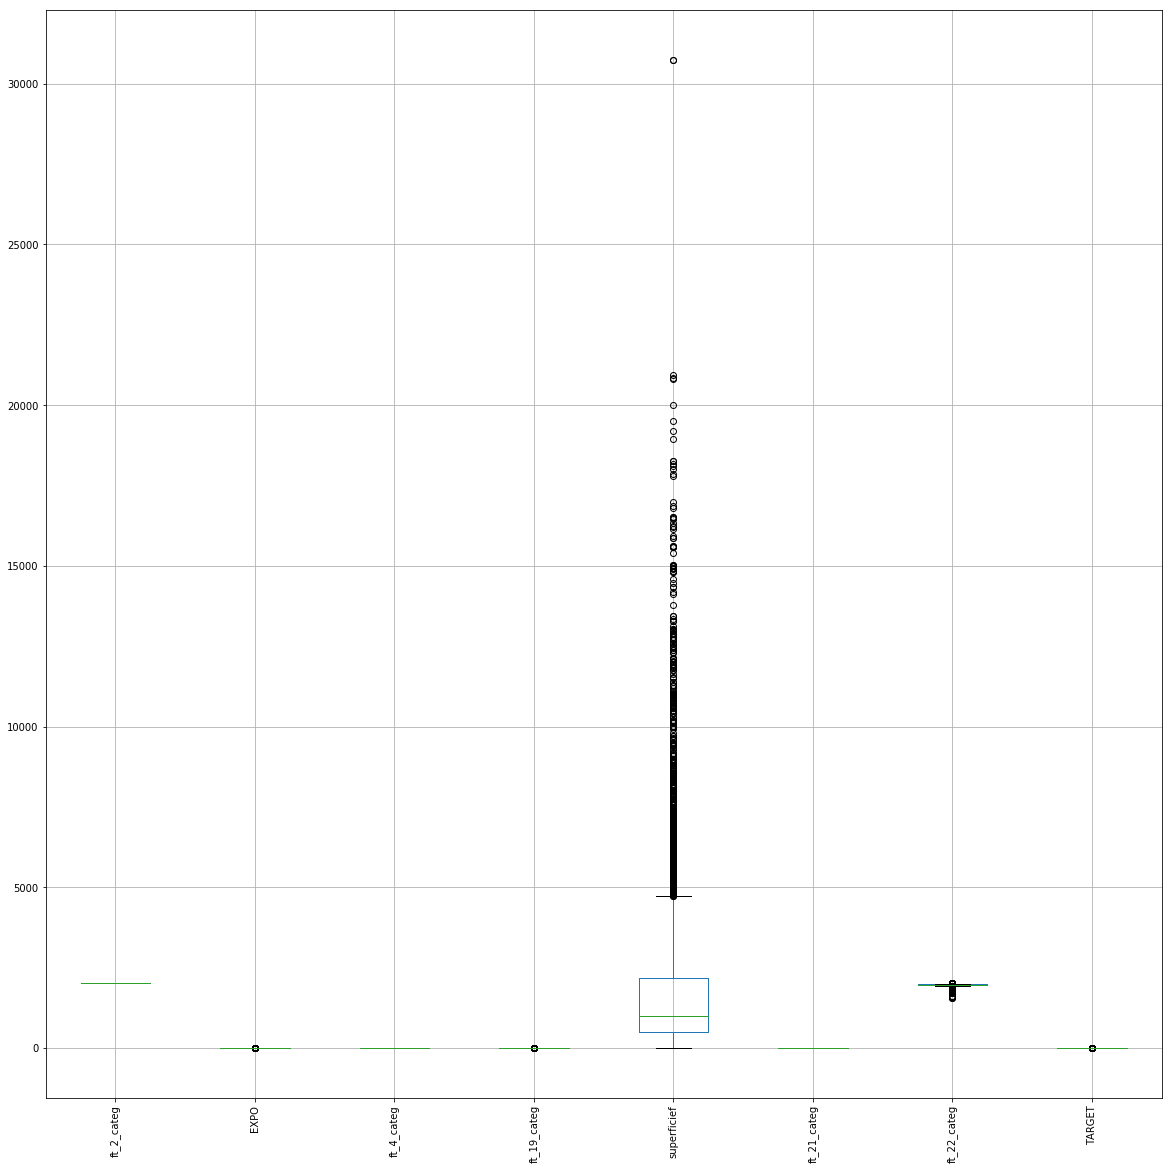

In [17]:
f, ax = plt.subplots(figsize=(20, 20))
train_data.boxplot(['ft_2_categ', 'EXPO', 'ft_4_categ','ft_19_categ', 'superficief', 'ft_21_categ', 'ft_22_categ','TARGET'],rot=90)
plt.show()

In [18]:
test_nan=(test_data.isnull().sum()/test_data.shape[0])*100
test_nan[['superficief','ft_22_categ','latitude','longitude']]

superficief      1.230950
ft_22_categ     11.781946
latitude       100.000000
longitude      100.000000
dtype: float64

In [19]:
train_data.drop(['latitude','longitude'],axis=1,inplace=True)
test_data.drop(['latitude','longitude'],axis=1,inplace=True)


### Statistical analysis of superficief attribute with value > 100 and < 15000

In [20]:
## superficief
train_data['superficief'].describe()

count    10110.000000
mean      1818.152918
std       2272.111284
min          1.000000
25%        500.000000
50%       1002.000000
75%       2190.000000
max      30745.000000
Name: superficief, dtype: float64

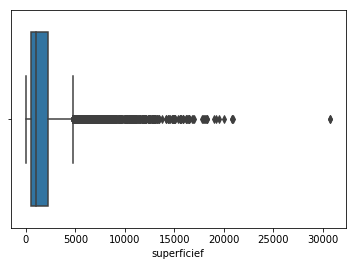

In [21]:
sns.boxplot(x=train_data['superficief'])

There are some outliers in superficief

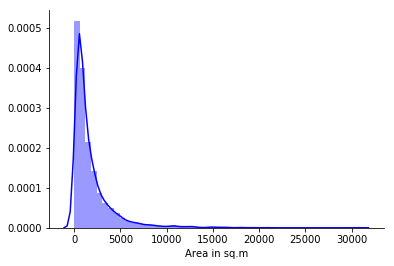

In [22]:
sns.distplot(train_data.superficief.dropna(),color='blue')
plt.xlabel('Area in sq.m')
sns.despine()

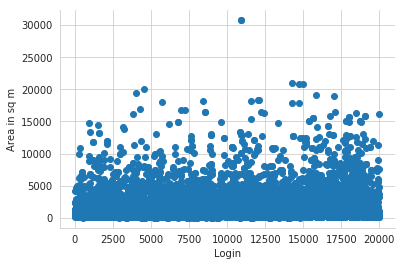

In [23]:
sns.set_style('whitegrid',{'access.edgecolor':'0'})
x=train_data['login']
y=train_data['superficief']
plt.xlabel('Login')
plt.ylabel('Area in sq m')
plt.scatter(x,y)
sns.despine()

The Maximum users has area between range of 100 to 15000

In [24]:
train_data[train_data.superficief>100]['superficief'].describe()

count    10021.000000
mean      1833.829358
std       2276.052092
min        104.000000
25%        518.000000
50%       1022.000000
75%       2200.000000
max      30745.000000
Name: superficief, dtype: float64

In [25]:
train_data[train_data.superficief<15000]['superficief'].describe()

count    10068.000000
mean      1752.146206
std       2021.729641
min          1.000000
25%        500.000000
50%       1000.000000
75%       2161.500000
max      14950.000000
Name: superficief, dtype: float64

In [26]:
train_data.loc[train_data.superficief>15000]=np.nan
train_data.loc[train_data.superficief<100]=np.nan
train_data.superficief.describe()

count    10005.000000
mean      1768.924138
std       2040.424244
min        100.000000
25%        510.000000
50%       1010.000000
75%       2184.000000
max      15000.000000
Name: superficief, dtype: float64

### Statistical analysis of ft_22_categ attribute with value > 1850 and < 2012

In [27]:
train_data.ft_22_categ.describe()

count    8910.000000
mean     1964.968350
std        33.640982
min      1545.000000
25%      1960.000000
50%      1969.000000
75%      1980.000000
max      2016.000000
Name: ft_22_categ, dtype: float64

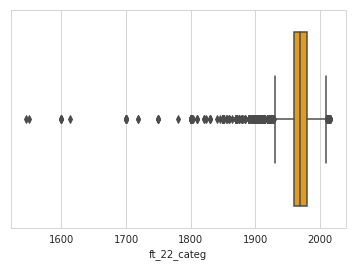

In [28]:
sns.boxplot(x=train_data['ft_22_categ'],color='orange')

boxplot shows that the ft_22_categ contain some outliers

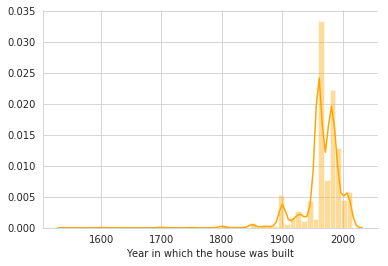

In [29]:
sns.distplot(train_data.ft_22_categ.dropna(),color='orange')
plt.xlabel('Year in which the house was built')
sns.despine()

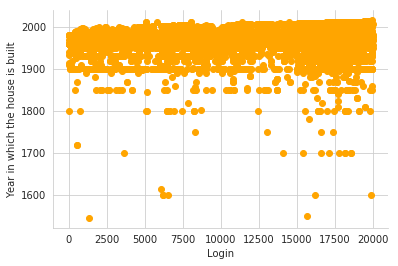

In [30]:
sns.set_style('whitegrid',{'access.edgecolor':'0'})
x=train_data['login']
y=train_data['ft_22_categ']
plt.xlabel('Login')
plt.ylabel('Year in which the house is built')
plt.scatter(x,y,color='orange')
sns.despine()

In [31]:
train_data[train_data.ft_22_categ>1850]['ft_22_categ'].describe()

count    8781.000000
mean     1967.354629
std        26.096286
min      1854.000000
25%      1960.000000
50%      1970.000000
75%      1980.000000
max      2016.000000
Name: ft_22_categ, dtype: float64

In [32]:
train_data[train_data.ft_22_categ<2012]['ft_22_categ'].describe()

count    8812.000000
mean     1964.438153
std        33.447434
min      1545.000000
25%      1960.000000
50%      1967.000000
75%      1980.000000
max      2011.000000
Name: ft_22_categ, dtype: float64

In [33]:
train_data.loc[train_data.ft_22_categ>2012]=np.nan
train_data.loc[train_data.ft_22_categ<1850]=np.nan
train_data.ft_22_categ.describe()

count    8808.000000
mean     1966.344005
std        27.681844
min      1850.000000
25%      1960.000000
50%      1970.000000
75%      1980.000000
max      2012.000000
Name: ft_22_categ, dtype: float64

### Data Visualization

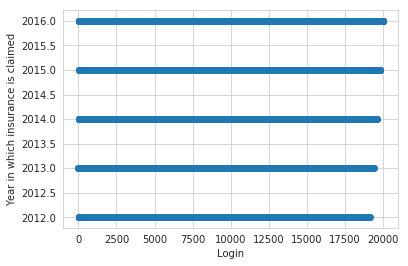

In [34]:

sns.set_style('whitegrid',{'access.edgecolor':'0'})
x=train_data['login']
y=train_data['ft_2_categ']
plt.xlabel('Login')
plt.ylabel('Year in which insurance is claimed')
plt.scatter(x,y)

There no missing data and outliers in the ft_2_categ 

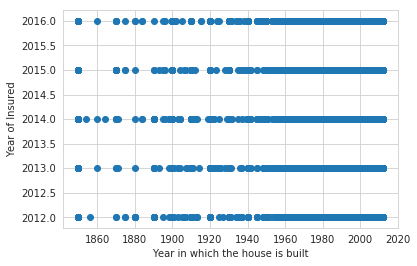

In [35]:
sns.set_style('whitegrid',{'access.edgecolor':'0'})
y=train_data['ft_2_categ']
x=train_data['ft_22_categ']
plt.xlabel('Year in which the house is built')
plt.ylabel('Year of Insured')
plt.scatter(x,y)


 from graph we infer that All house in our train Dataset has Claimed insurace between 2012-2016

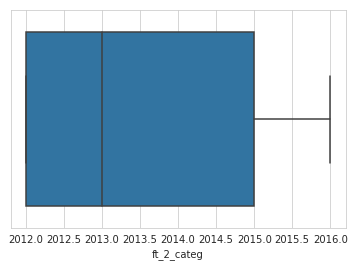

In [36]:
sns.boxplot(x=train_data['ft_2_categ'])

There is no outliers in ft_2_categ

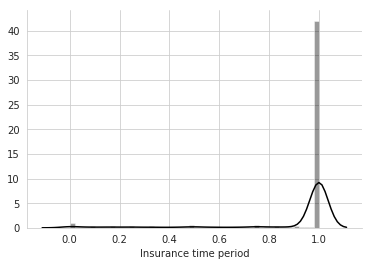

In [37]:
sns.distplot(train_data.EXPO.dropna(),color='black')
plt.xlabel('Insurance time period')
sns.despine()

Maximum number of users has claimed their insurance in the period of 1 year

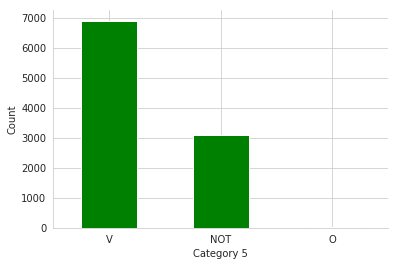

In [38]:
train_data.ft_5_categ.value_counts(dropna=True).plot(kind='bar',color='green',rot=0)
plt.xlabel('Category 5')
plt.ylabel('Count')
sns.despine()

ft_5_categ has the highest frequency of V

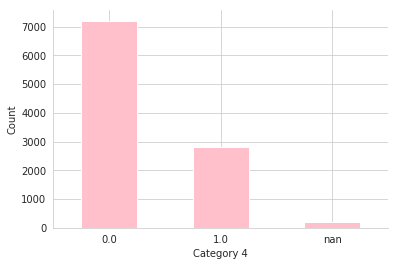

In [39]:
train_data.ft_4_categ.value_counts(dropna=False).plot(kind='bar',color='pink',rot=0)
plt.xlabel('Category 4')
plt.ylabel('Count')
sns.despine()

ft_4_categ has the highest frequency of class 0

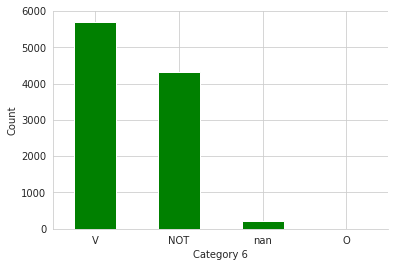

In [40]:
train_data.ft_6_categ.value_counts(dropna=False).plot(kind='bar',color='green',rot=0)
plt.xlabel('Category 6')
plt.ylabel('Count')
sns.despine()

ft_6_categ is a categorical feature with the highest frequency of class V

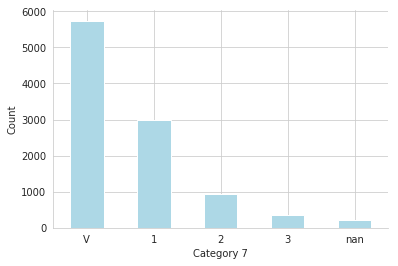

In [41]:
train_data.ft_7_categ.value_counts(dropna=False).plot(kind='bar',color='lightblue',rot=0)
plt.xlabel('Category 7')
plt.ylabel('Count')
sns.despine()

ft_7_categ is a categorical feature with the highest frequency of class V

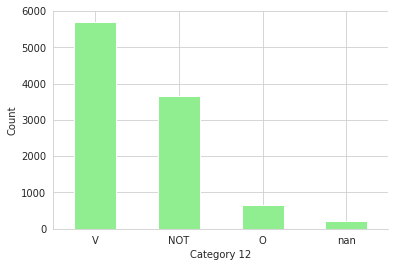

In [42]:
train_data.ft_12_categ.value_counts(dropna=False).plot(kind='bar',color='lightgreen',rot=0)
plt.xlabel('Category 12')
plt.ylabel('Count')
sns.despine()


ft_12_categ is a categorical feature with the highest frequency of class V

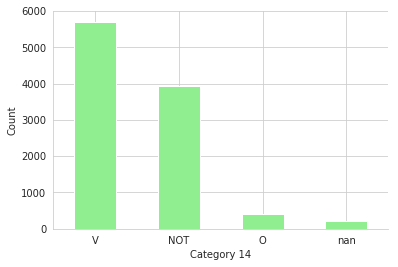

In [43]:
train_data.ft_14_categ.value_counts(dropna=False).plot(kind='bar',color='lightgreen',rot=0)
plt.xlabel('Category 14')
plt.ylabel('Count')
sns.despine()

ft_14_categ is a categorical feature with the highest frequency of class V

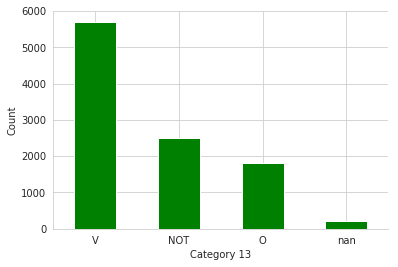

In [44]:
train_data.ft_13_categ.value_counts(dropna=False).plot(kind='bar',color='green',rot=0)
plt.xlabel('Category 13')
plt.ylabel('Count')
sns.despine()


ft_13_categ is a categorical feature with the highest frequency of class V

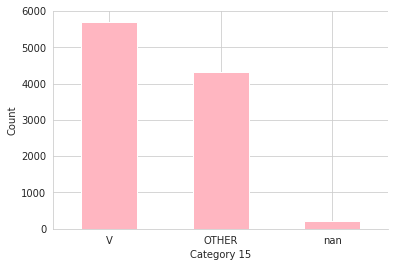

In [45]:
train_data.ft_15_categ.replace('AUTRE','OTHER',inplace=True)
train_data.ft_15_categ
train_data.ft_15_categ.value_counts(dropna=False).plot(kind='bar',color='lightpink',rot=0)
plt.xlabel('Category 15')
plt.ylabel('Count')
sns.despine()
plt.show()

ft_15_categ is a categorical feature with the highest frequency of class V

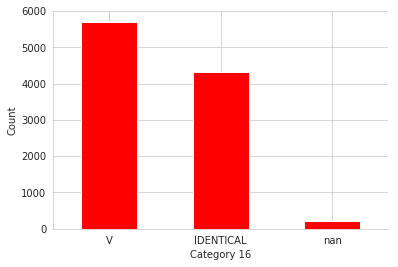

In [46]:
train_data.ft_16_categ.replace('IDENTIQUE','IDENTICAL',inplace=True)
train_data.ft_16_categ.value_counts(dropna=False).plot(kind='bar',color='red',rot=0)
plt.xlabel('Category 16')
plt.ylabel('Count')
sns.despine()

ft_16_categ is a categorical feature with the highest frequency of class V

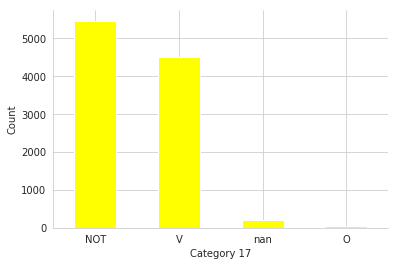

In [47]:
train_data.ft_17_categ.replace('IDENTIQUE','IDENTICAL',inplace=True)
train_data.ft_17_categ.value_counts(dropna=False).plot(kind='bar',color='yellow',rot=0)
plt.xlabel('Category 17')
plt.ylabel('Count')
sns.despine()

ft_17_categ is a categorical feature with the highest frequency of class NOT

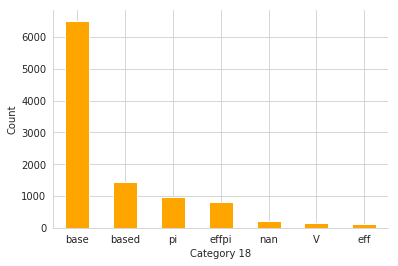

In [48]:
train_data.ft_18_categ.replace('IDENTIQUE','IDENTICAL',inplace=True)
train_data.ft_18_categ.value_counts(dropna=False).plot(kind='bar',color='orange',rot=0)
plt.xlabel('Category 18')
plt.ylabel('Count')
sns.despine()

ft_18_categ is a categorical feature with the highest frequency of class base

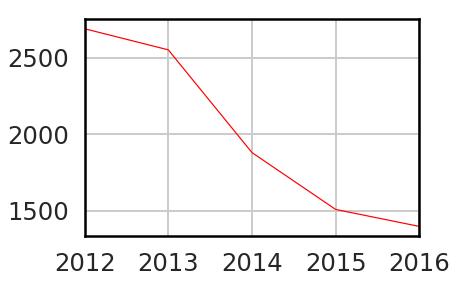

In [49]:
sns.set_style("whitegrid", {'axes.edgecolor': '0'})
sns.set_context("poster", font_scale=1.1)
train_data.ft_2_categ.value_counts().plot(kind='line', linewidth=1.2, color='red')


From the above line graph, we infer that the number of houses insured has a drastic decrease from 2012 to 2016

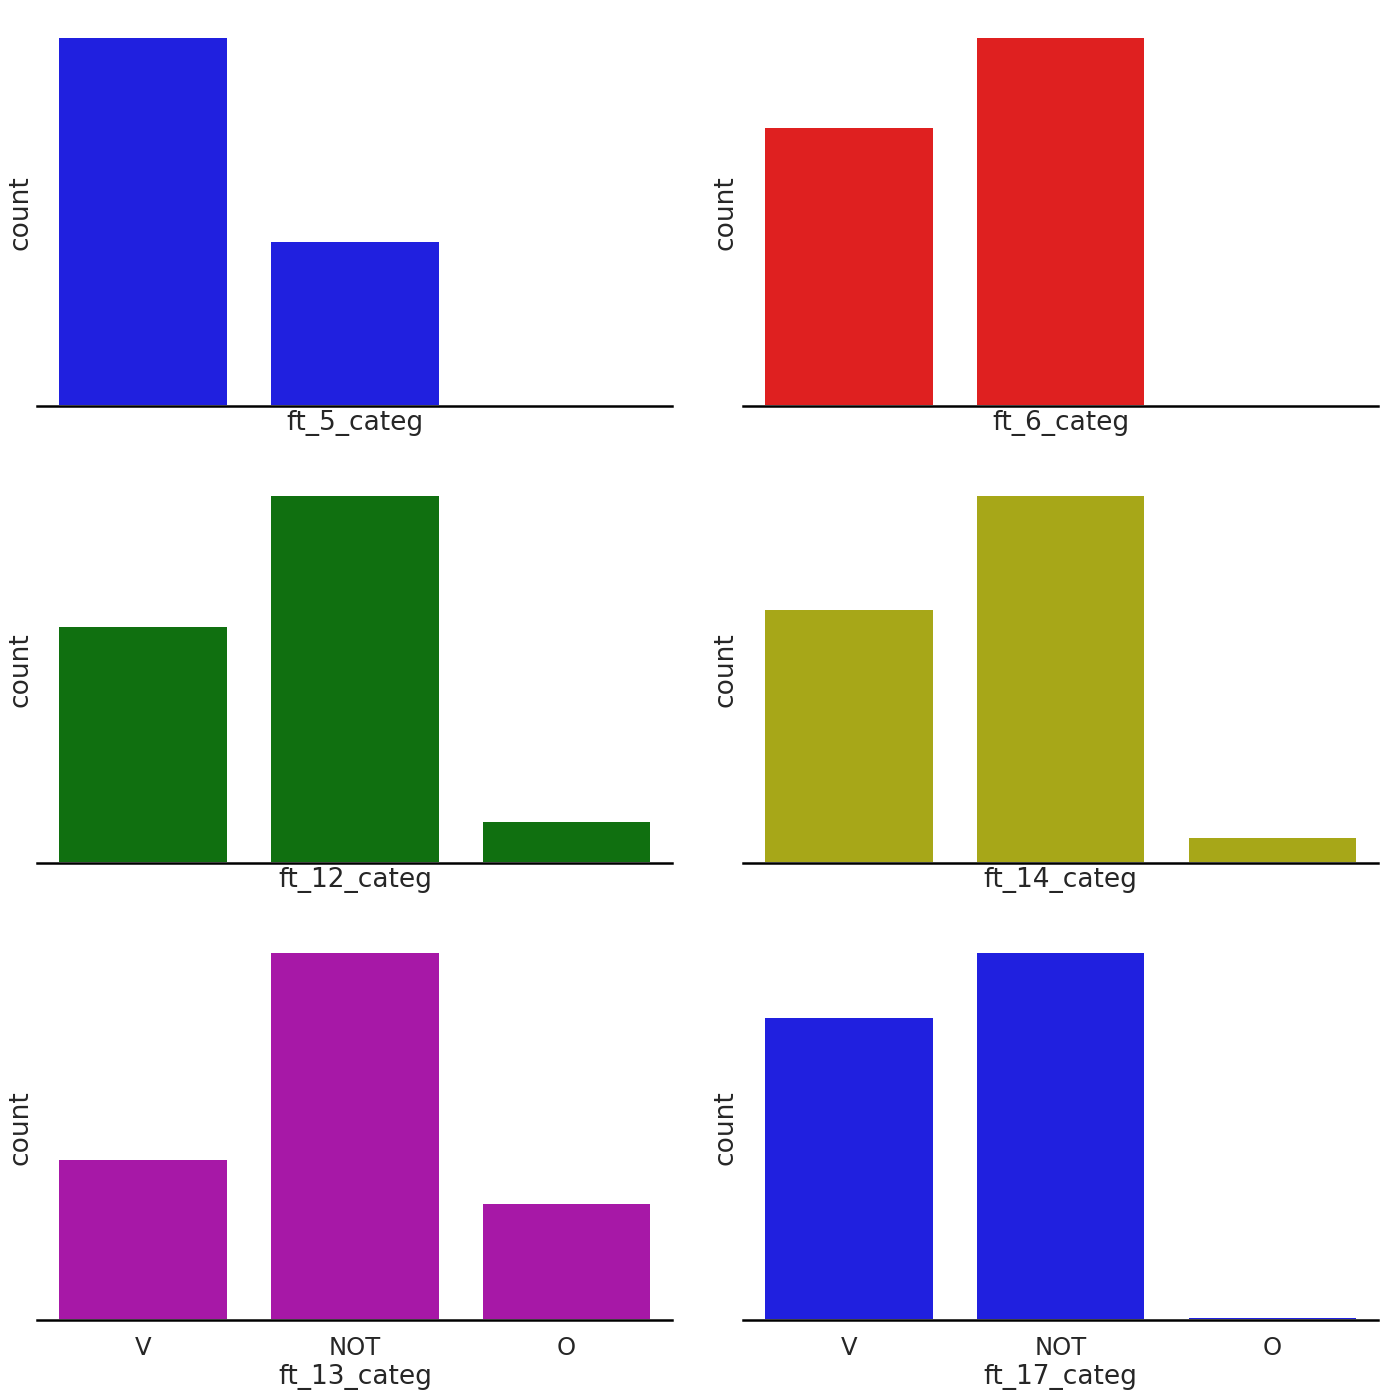

In [50]:
f,a=plt.subplots(3,2,figsize=(20,20),sharex=True)
sns.despine(left=True)
sns.countplot(x="ft_5_categ",data=train_data,color="b",ax=a[0,0])
sns.countplot(x="ft_6_categ",data=train_data,color="r",ax=a[0,1])
sns.countplot(x="ft_12_categ",data=train_data,color="g",ax=a[1,0])
sns.countplot(x="ft_14_categ",data=train_data,color="y",ax=a[1,1])
sns.countplot(x="ft_13_categ",data=train_data,color="m",ax=a[2,0])
sns.countplot(x="ft_17_categ",data=train_data,color="b",ax=a[2,1])
plt.setp(a,yticks=[])
plt.tight_layout()

This is a comparative study of the features having the same classes namely V,NOT,O

In [51]:
test_login=test_data['login']
test_login.head()

0    16872.0
1    16852.0
2      598.0
3     4516.0
4     7939.0
Name: login, dtype: float64

Storing the login attribute which is further used during the final output creation

### Removing attribute login as it does not support in the prediction

In [52]:
train_data.drop('login',axis=1,inplace=True)
test_data.drop('login',axis=1,inplace=True)
train_data.head()

,EXPO,ft_10_categ,ft_11_categ,ft_12_categ,ft_13_categ,ft_14_categ,ft_15_categ,ft_16_categ,ft_17_categ,ft_18_categ,...,ft_24_categ,ft_2_categ,ft_4_categ,ft_5_categ,ft_6_categ,ft_7_categ,ft_8_categ,ft_9_categ,superficief,TARGET
0,1.000000,O,NOT,NOT,NOT,NOT,OTHER,IDENTICAL,V,based,...,2,2014.0,0.0,V,NOT,1,O,1,1351.0,0.0
1,1.000000,V,V,V,V,V,V,V,NOT,based,...,0,2014.0,0.0,V,V,V,V,V,1972.0,1.0
2,1.000000,V,V,V,V,V,V,V,NOT,based,...,0,2013.0,1.0,V,V,V,V,V,1630.0,0.0
3,0.246575,V,V,V,V,V,V,V,NOT,based,...,0,2013.0,0.0,NOT,V,V,V,V,532.0,0.0
4,1.000000,O,NOT,NOT,O,NOT,OTHER,IDENTICAL,V,based,...,4,2015.0,0.0,V,NOT,2,O,1,1050.0,0.0


In [53]:
test_data.head()

,EXPO,ft_10_categ,ft_11_categ,ft_12_categ,ft_13_categ,ft_14_categ,ft_15_categ,ft_16_categ,ft_17_categ,ft_18_categ,...,ft_23_categ,ft_24_categ,ft_2_categ,ft_4_categ,ft_5_categ,ft_6_categ,ft_7_categ,ft_8_categ,ft_9_categ,superficief
0,1.000000,O,NOT,NOT,O,NOT,OTHER,IDENTICAL,V,effpi,...,0,4,2012.0,1.0,V,NOT,1,O,1,2682.0
1,1.000000,O,NOT,NOT,O,NOT,OTHER,IDENTICAL,V,based,...,0,6,2012.0,1.0,V,NOT,1,O,1,2925.0
2,1.000000,V,V,V,V,V,V,V,NOT,based,...,0,0,2014.0,1.0,V,V,V,V,V,525.0
3,0.161644,V,V,V,V,V,V,V,NOT,based,...,0,0,2013.0,0.0,NOT,V,V,V,V,443.0
4,1.000000,V,V,V,V,V,V,V,NOT,based,...,0,0,2013.0,0.0,NOT,V,V,V,V,1070.0


In [54]:
nan_data1=train_data.isnull().sum()
nan_data1

EXPO            207
ft_10_categ     207
ft_11_categ     207
ft_12_categ     207
ft_13_categ     207
ft_14_categ     207
ft_15_categ     207
ft_16_categ     207
ft_17_categ     207
ft_18_categ     207
ft_19_categ     207
ft_21_categ     207
ft_22_categ    1421
ft_23_categ     207
ft_24_categ     207
ft_2_categ      207
ft_4_categ      207
ft_5_categ      207
ft_6_categ      207
ft_7_categ      207
ft_8_categ      207
ft_9_categ      207
superficief     318
TARGET          207
dtype: int64

# Data Preprocessing

### Data Cleaning

### Filling in Missing values

In [55]:
train_data['superficief']=train_data['superficief'].interpolate(method='linear',limit_direction='forward')

In [56]:
train_data['ft_22_categ']=train_data['ft_22_categ'].interpolate(method='linear',limit_direction='forward')

In [57]:
train_data['ft_23_categ']=train_data.ft_23_categ.replace('V',np.nan)

In [58]:
train_data['ft_23_categ']=train_data['ft_23_categ'].astype('float')

In [59]:
train_data['ft_23_categ'].describe()

count    9915.000000
mean        0.067474
std         0.191777
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         2.000000
Name: ft_23_categ, dtype: float64

In [60]:
train_data['ft_23_categ']=train_data['ft_23_categ'].interpolate(method='linear',limit_direction='forward')

In [61]:
train_data['ft_24_categ']=train_data.ft_24_categ.replace('> = 10',10)
train_data['ft_24_categ']=train_data.ft_24_categ.replace('>=10',10)
train_data['ft_24_categ']=train_data['ft_24_categ'].astype('float')
train_data['ft_24_categ']=train_data['ft_24_categ'].interpolate(method='linear',limit_direction='forward')

In [62]:
train_data['ft_7_categ']=train_data.ft_7_categ.replace('V',np.nan)
train_data['ft_7_categ']=train_data['ft_7_categ'].astype('float')
train_data['ft_7_categ']=train_data['ft_7_categ'].interpolate(method='linear',limit_direction='forward')

In [63]:
train_data['ft_9_categ']=train_data.ft_9_categ.replace('V',np.nan)
train_data['ft_9_categ']=train_data['ft_9_categ'].astype('float')
train_data['ft_9_categ']=train_data['ft_9_categ'].interpolate(method='linear',limit_direction='forward')

In [64]:
train_data['ft_2_categ']=train_data['ft_2_categ'].interpolate(method='linear',limit_direction='forward')

In [65]:
train_data['EXPO']=train_data['EXPO'].interpolate(method='linear',limit_direction='forward')

In [66]:
train_data['ft_4_categ']=train_data['ft_4_categ'].interpolate(method='linear',limit_direction='forward')

In [67]:
train_data['ft_5_categ']=train_data['ft_5_categ'].interpolate(method='linear',limit_direction='forward')

In [68]:
train_data['ft_6_categ']=train_data['ft_6_categ'].interpolate(method='linear',limit_direction='forward')

In [69]:
train_data['ft_8_categ']=train_data['ft_8_categ'].interpolate(method='linear',limit_direction='forward')

In [70]:
train_data['ft_10_categ']=train_data['ft_10_categ'].interpolate(method='linear',limit_direction='forward')

In [71]:
train_data['ft_11_categ']=train_data['ft_11_categ'].interpolate(method='linear',limit_direction='forward')

In [72]:
train_data['ft_12_categ']=train_data['ft_12_categ'].interpolate(method='linear',limit_direction='forward')

In [73]:
train_data['ft_13_categ']=train_data['ft_13_categ'].interpolate(method='linear',limit_direction='forward')

In [74]:
train_data['ft_14_categ']=train_data['ft_14_categ'].interpolate(method='linear',limit_direction='forward')

In [75]:
train_data['ft_15_categ']=train_data['ft_15_categ'].interpolate(method='linear',limit_direction='forward')

In [76]:
train_data['ft_16_categ']=train_data['ft_16_categ'].interpolate(method='linear',limit_direction='forward')

In [77]:
train_data['ft_17_categ']=train_data['ft_17_categ'].interpolate(method='linear',limit_direction='forward')

In [78]:
train_data['ft_18_categ']=train_data['ft_18_categ'].interpolate(method='linear',limit_direction='forward')

In [79]:
train_data['ft_19_categ']=train_data['ft_19_categ'].interpolate(method='linear',limit_direction='forward')

In [80]:
train_data['ft_21_categ']=train_data['ft_21_categ'].interpolate(method='linear',limit_direction='forward')

In [81]:
train_data['TARGET']=train_data['TARGET'].interpolate(method='linear',limit_direction='forward')

In [82]:
train_data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
EXPO,10229.0,0.915155,0.230248,0.0,1.0,1.0,1.000000,1.0
ft_19_categ,10229.0,1.939828,0.236644,1.0,2.0,2.0,2.000000,2.0
ft_21_categ,10229.0,2.238342,0.956217,1.0,2.0,2.0,3.000000,4.0
ft_22_categ,10229.0,1966.399355,26.809675,1850.0,1960.0,1970.0,1980.000000,2012.0
ft_23_categ,10229.0,0.067920,0.190618,0.0,0.0,0.0,0.000000,2.0
ft_24_categ,10229.0,1.858393,2.427788,0.0,0.0,0.0,4.000000,10.0
ft_2_categ,10229.0,2013.636524,1.372438,2012.0,2012.0,2013.0,2015.000000,2016.0
ft_4_categ,10229.0,0.280428,0.447198,0.0,0.0,0.0,1.000000,1.0
ft_7_categ,10229.0,1.379069,0.543525,1.0,1.0,1.0,1.714286,3.0
ft_9_categ,10229.0,1.001369,0.037410,1.0,1.0,1.0,1.000000,3.0


### Finding correlation between attributes

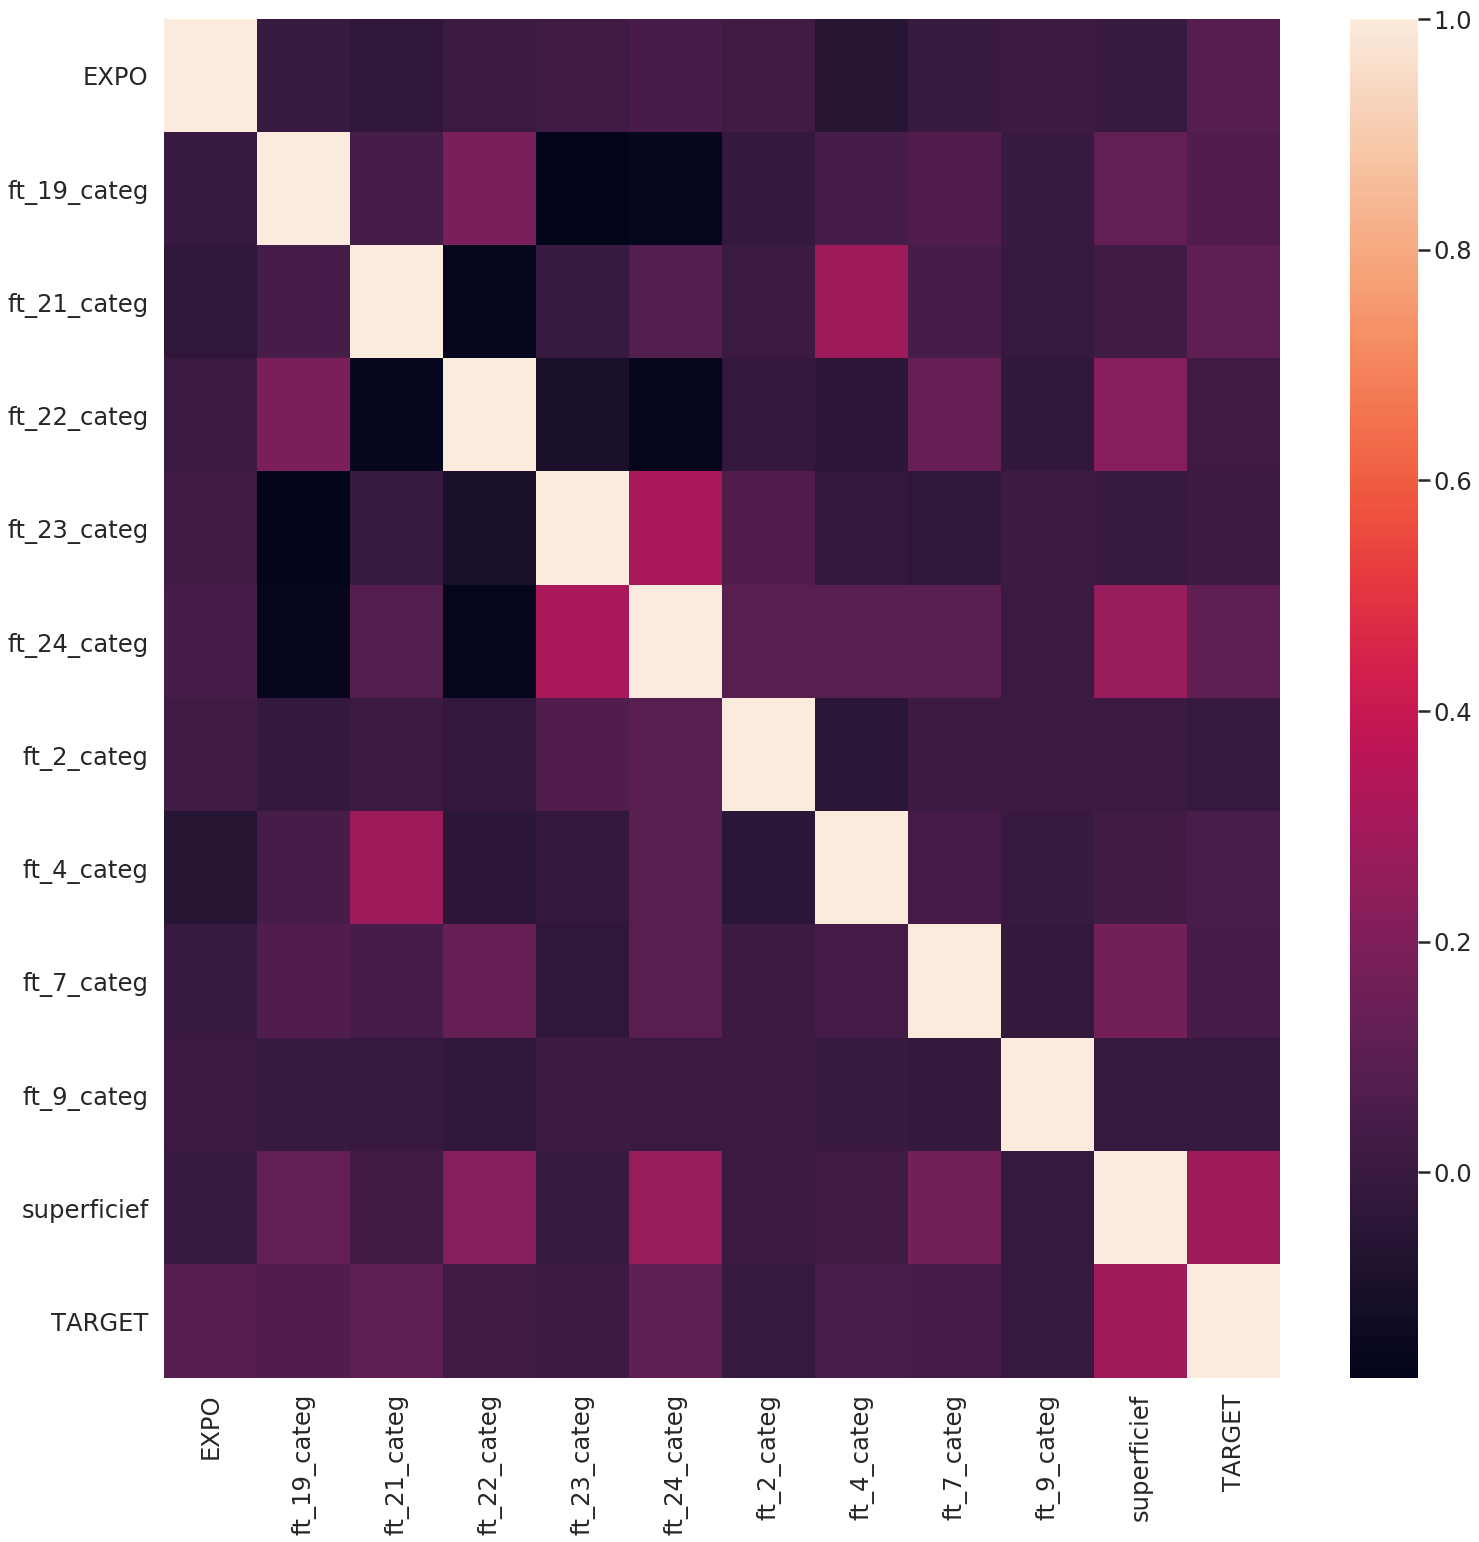

In [83]:
corr = train_data.corr()
fig, ax = plt.subplots(figsize=(25,25)) 
sns.heatmap(corr,xticklabels=corr.columns,yticklabels=corr.columns)

In [84]:
cmap = cmap=sns.diverging_palette(5, 250, as_cmap=True)

def magnify():
    return [dict(selector="th",
                 props=[("font-size", "7pt")]),
            dict(selector="td",
                 props=[('padding', "0em 0em")]),
            dict(selector="th:hover",
                 props=[("font-size", "12pt")]),
            dict(selector="tr:hover td:hover",
                 props=[('max-width', '200px'),
                        ('font-size', '12pt')])
]

corr.style.background_gradient(cmap, axis=1)\
    .set_properties(**{'max-width': '80px', 'font-size': '10pt'})\
    .set_caption("Hover to magify")\
    .set_precision(2)\
    .set_table_styles(magnify())

,EXPO,ft_19_categ,ft_21_categ,ft_22_categ,ft_23_categ,ft_24_categ,ft_2_categ,ft_4_categ,ft_7_categ,ft_9_categ,superficief,TARGET
EXPO,1,0.0007,-0.03,0.0027,0.017,0.046,0.021,-0.054,-0.0031,0.011,-0.0015,0.088
ft_19_categ,0.0007,1,0.04,0.19,-0.18,-0.16,-0.015,0.041,0.068,-0.0017,0.12,0.068
ft_21_categ,-0.03,0.04,1,-0.16,-0.0027,0.076,0.003,0.29,0.038,-0.0073,0.02,0.11
ft_22_categ,0.0027,0.19,-0.16,1,-0.096,-0.17,-0.018,-0.038,0.13,-0.026,0.22,0.017
ft_23_categ,0.017,-0.18,-0.0027,-0.096,1,0.31,0.067,-0.019,-0.027,0.0075,-0.0021,0.007
ft_24_categ,0.046,-0.16,0.076,-0.17,0.31,1,0.095,0.092,0.091,0.0021,0.26,0.12
ft_2_categ,0.021,-0.015,0.003,-0.018,0.067,0.095,1,-0.048,0.0082,0.0097,0.0025,-0.011
ft_4_categ,-0.054,0.041,0.29,-0.038,-0.019,0.092,-0.048,1,0.038,-0.0025,0.022,0.048
ft_7_categ,-0.0031,0.068,0.038,0.13,-0.027,0.091,0.0082,0.038,1,-0.013,0.17,0.045
ft_9_categ,0.011,-0.0017,-0.0073,-0.026,0.0075,0.0021,0.0097,-0.0025,-0.013,1,-0.009,-0.0064


From the heat maps and correlation matrix it is visible that ft_19_categ is negatively correlated with ft_23_categ
and ft_24_categ and ft_22_categ is negatively correlated with ft_24_categ and ft_21_categ

In [85]:
# From the heat maps and correlation matrix it is visible that ft_19_categ is negatively correlated with ft_23_categ
#and ft_24_categ
train_data.drop('ft_19_categ',axis=1,inplace=True)
train_data.drop('ft_24_categ',axis=1,inplace=True)
train_data.drop('ft_21_categ',axis=1,inplace=True)

### Data Transformation

### Label Encoding Categorical Attributes

In [86]:
from pandas.api.types import CategoricalDtype
def convert_Encoding(df,col):
    df[col],_ =pd.factorize(df[col])
    return df

print("Encoding categorical data...")
columns_to_convert = [ 'ft_5_categ','ft_6_categ', 'ft_8_categ', 'ft_10_categ', 'ft_11_categ', 'ft_12_categ', 'ft_13_categ', 'ft_14_categ','ft_15_categ','ft_16_categ','ft_17_categ','ft_18_categ']

for column in columns_to_convert:
    train_data= convert_Encoding(df=train_data,col=column)
print("Encoding complete...")

Encoding categorical data...
Encoding complete...


In [87]:
train_data.head()

,EXPO,ft_10_categ,ft_11_categ,ft_12_categ,ft_13_categ,ft_14_categ,ft_15_categ,ft_16_categ,ft_17_categ,ft_18_categ,...,ft_23_categ,ft_2_categ,ft_4_categ,ft_5_categ,ft_6_categ,ft_7_categ,ft_8_categ,ft_9_categ,superficief,TARGET
0,1.000000,0,0,0,0,0,0,0,0,0,...,0.0,2014.0,0.0,0,0,1.00,0,1.0,1351.0,0.0
1,1.000000,1,1,1,1,1,1,1,1,0,...,0.0,2014.0,0.0,0,1,1.25,1,1.0,1972.0,1.0
2,1.000000,1,1,1,1,1,1,1,1,0,...,0.0,2013.0,1.0,0,1,1.50,1,1.0,1630.0,0.0
3,0.246575,1,1,1,1,1,1,1,1,0,...,0.0,2013.0,0.0,1,1,1.75,1,1.0,532.0,0.0
4,1.000000,0,0,0,2,0,0,0,0,0,...,0.0,2015.0,0.0,0,0,2.00,0,1.0,1050.0,0.0


In [88]:
train_data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
EXPO,10229.0,0.915155,0.230248,0.0,1.0,1.0,1.000000,1.0
ft_10_categ,10229.0,0.541011,0.540865,-1.0,0.0,1.0,1.000000,2.0
ft_11_categ,10229.0,0.538176,0.538537,-1.0,0.0,1.0,1.000000,2.0
ft_12_categ,10229.0,0.664483,0.625093,-1.0,0.0,1.0,1.000000,2.0
ft_13_categ,10229.0,0.892463,0.701255,-1.0,0.0,1.0,1.000000,2.0
ft_14_categ,10229.0,0.614430,0.595521,-1.0,0.0,1.0,1.000000,2.0
ft_15_categ,10229.0,0.537198,0.537697,-1.0,0.0,1.0,1.000000,1.0
ft_16_categ,10229.0,0.537198,0.537697,-1.0,0.0,1.0,1.000000,1.0
ft_17_categ,10229.0,0.524880,0.548126,-1.0,0.0,1.0,1.000000,2.0
ft_18_categ,10229.0,3.604458,2.030941,-1.0,2.0,5.0,5.000000,5.0


### Data Normalization

In [89]:
train_data.ft_2_categ=minmax_scaling(train_data['ft_2_categ'],columns=0)

In [90]:
train_data.EXPO=minmax_scaling(train_data['EXPO'],columns=0)

In [91]:
train_data.ft_4_categ=minmax_scaling(train_data['ft_4_categ'],columns=0)

In [92]:
train_data.ft_7_categ=minmax_scaling(train_data['ft_7_categ'],columns=0)

In [93]:
train_data.ft_9_categ=minmax_scaling(train_data['ft_9_categ'],columns=0)

In [94]:
train_data.superficief=minmax_scaling(train_data['superficief'],columns=0)

In [95]:
train_data.ft_22_categ=minmax_scaling(train_data['ft_22_categ'],columns=0)

In [96]:
train_data.ft_23_categ=minmax_scaling(train_data['ft_23_categ'],columns=0)

In [97]:
train_data.ft_5_categ=minmax_scaling(train_data['ft_5_categ'],columns=0)
train_data.ft_6_categ=minmax_scaling(train_data['ft_6_categ'],columns=0)
train_data.ft_8_categ=minmax_scaling(train_data['ft_8_categ'],columns=0)
train_data.ft_10_categ=minmax_scaling(train_data['ft_10_categ'],columns=0)
train_data.ft_11_categ=minmax_scaling(train_data['ft_11_categ'],columns=0)
train_data.ft_12_categ=minmax_scaling(train_data['ft_12_categ'],columns=0)
train_data.ft_13_categ=minmax_scaling(train_data['ft_13_categ'],columns=0)
train_data.ft_14_categ=minmax_scaling(train_data['ft_14_categ'],columns=0)
train_data.ft_15_categ=minmax_scaling(train_data['ft_15_categ'],columns=0)
train_data.ft_16_categ=minmax_scaling(train_data['ft_16_categ'],columns=0)
train_data.ft_17_categ=minmax_scaling(train_data['ft_17_categ'],columns=0)
train_data.ft_18_categ=minmax_scaling(train_data['ft_18_categ'],columns=0)

In [98]:
train_data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
EXPO,10229.0,0.915155,0.230248,0.0,1.000000,1.000000,1.000000,1.0
ft_10_categ,10229.0,0.513670,0.180288,0.0,0.333333,0.666667,0.666667,1.0
ft_11_categ,10229.0,0.512725,0.179512,0.0,0.333333,0.666667,0.666667,1.0
ft_12_categ,10229.0,0.554828,0.208364,0.0,0.333333,0.666667,0.666667,1.0
ft_13_categ,10229.0,0.630821,0.233752,0.0,0.333333,0.666667,0.666667,1.0
ft_14_categ,10229.0,0.538143,0.198507,0.0,0.333333,0.666667,0.666667,1.0
ft_15_categ,10229.0,0.768599,0.268848,0.0,0.500000,1.000000,1.000000,1.0
ft_16_categ,10229.0,0.768599,0.268848,0.0,0.500000,1.000000,1.000000,1.0
ft_17_categ,10229.0,0.508293,0.182709,0.0,0.333333,0.666667,0.666667,1.0
ft_18_categ,10229.0,0.767410,0.338490,0.0,0.500000,1.000000,1.000000,1.0


In [99]:
train_data.shape[1]

21

In [100]:
train_data.columns

Index(['EXPO', 'ft_10_categ', 'ft_11_categ', 'ft_12_categ', 'ft_13_categ',
       'ft_14_categ', 'ft_15_categ', 'ft_16_categ', 'ft_17_categ',
       'ft_18_categ', 'ft_22_categ', 'ft_23_categ', 'ft_2_categ', 'ft_4_categ',
       'ft_5_categ', 'ft_6_categ', 'ft_7_categ', 'ft_8_categ', 'ft_9_categ',
       'superficief', 'TARGET'],
      dtype='object')

### Correlation of Transformed Attributes

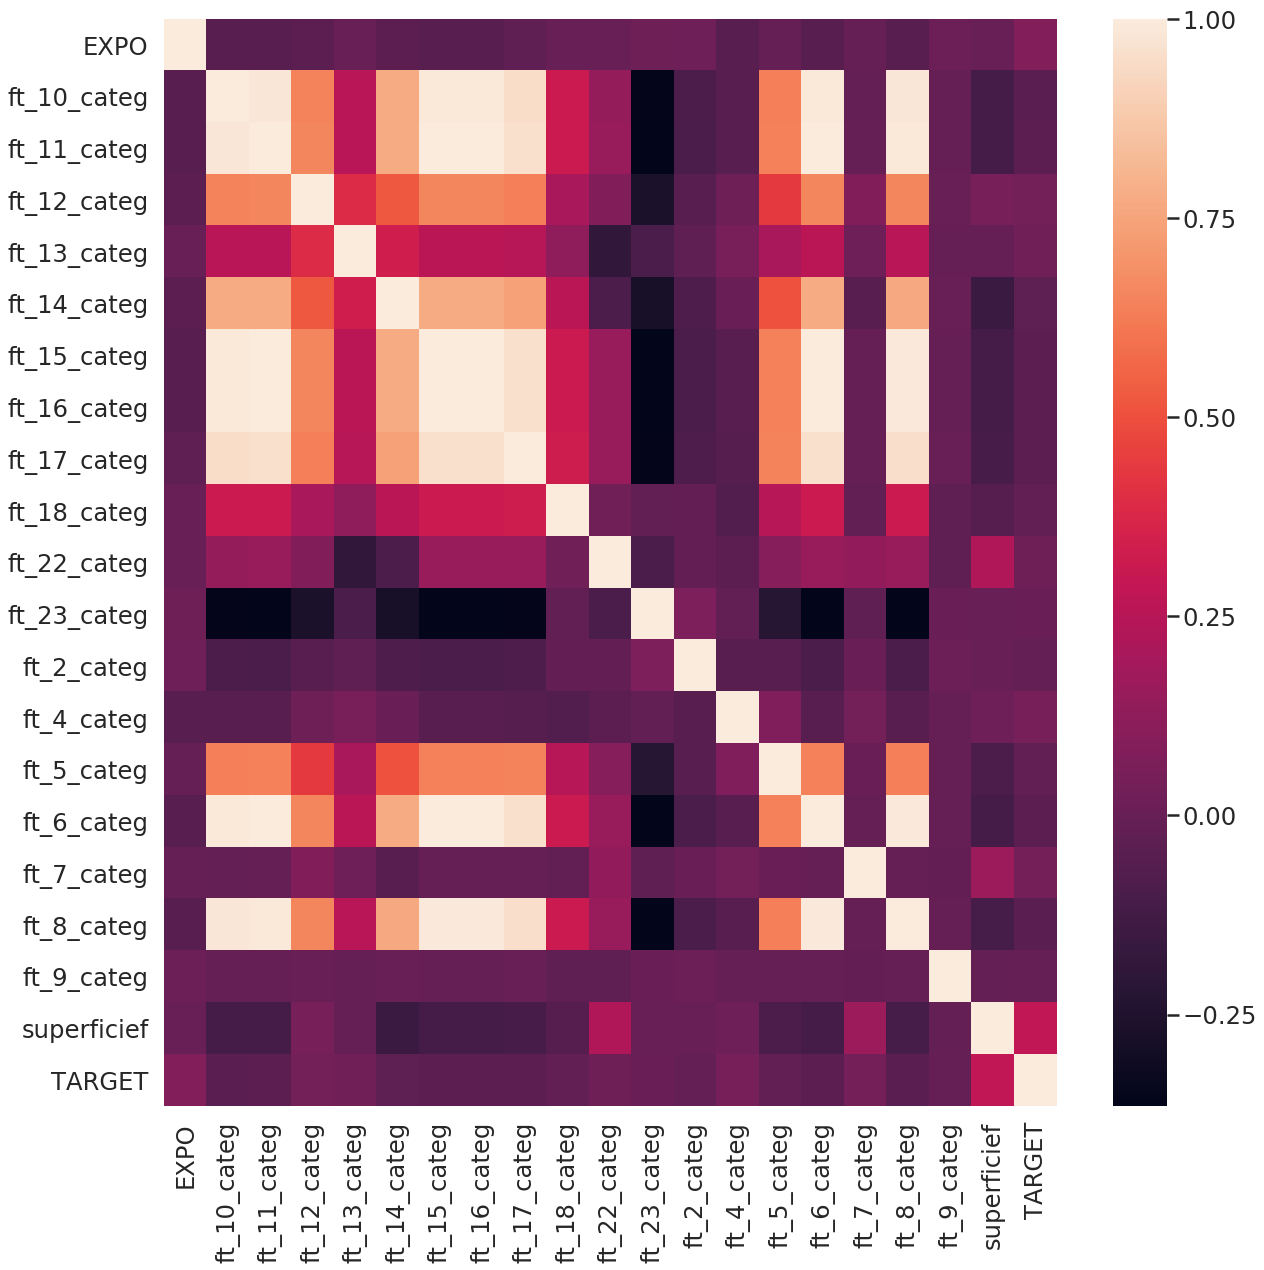

In [101]:
corr = train_data.corr()
fig, ax = plt.subplots(figsize=(20,20)) 
sns.heatmap(corr,xticklabels=corr.columns,yticklabels=corr.columns)

In [102]:
cmap = cmap=sns.diverging_palette(5, 250, as_cmap=True)

def magnify():
    return [dict(selector="th",
                 props=[("font-size", "7pt")]),
            dict(selector="td",
                 props=[('padding', "0em 0em")]),
            dict(selector="th:hover",
                 props=[("font-size", "12pt")]),
            dict(selector="tr:hover td:hover",
                 props=[('max-width', '200px'),
                        ('font-size', '12pt')])
]

corr.style.background_gradient(cmap, axis=1)\
    .set_properties(**{'max-width': '80px', 'font-size': '10pt'})\
    .set_caption("Hover to magify")\
    .set_precision(2)\
    .set_table_styles(magnify())

,EXPO,ft_10_categ,ft_11_categ,ft_12_categ,ft_13_categ,ft_14_categ,ft_15_categ,ft_16_categ,ft_17_categ,ft_18_categ,ft_22_categ,ft_23_categ,ft_2_categ,ft_4_categ,ft_5_categ,ft_6_categ,ft_7_categ,ft_8_categ,ft_9_categ,superficief,TARGET
EXPO,1,-0.048,-0.05,-0.036,-0.0021,-0.038,-0.049,-0.049,-0.026,0.0012,0.0027,0.017,0.021,-0.054,-0.0037,-0.049,-0.0031,-0.048,0.011,-0.0015,0.088
ft_10_categ,-0.048,1,0.98,0.65,0.26,0.77,0.99,0.99,0.95,0.31,0.15,-0.36,-0.089,-0.051,0.63,0.99,-0.0085,0.98,-0.0028,-0.12,-0.041
ft_11_categ,-0.05,0.98,1,0.65,0.26,0.77,1,1,0.96,0.32,0.15,-0.36,-0.093,-0.052,0.64,1,-0.0042,0.99,-0.0026,-0.12,-0.039
ft_12_categ,-0.036,0.65,0.65,1,0.39,0.52,0.66,0.66,0.63,0.21,0.08,-0.27,-0.052,0.017,0.44,0.66,0.079,0.66,-0.0013,0.05,0.036
ft_13_categ,-0.0021,0.26,0.26,0.39,1,0.33,0.26,0.26,0.25,0.13,-0.19,-0.096,-0.026,0.055,0.21,0.26,0.023,0.26,-0.0056,-0.0038,0.033
ft_14_categ,-0.038,0.77,0.77,0.52,0.33,1,0.77,0.77,0.74,0.26,-0.092,-0.28,-0.083,0.0077,0.5,0.77,-0.051,0.77,0.0017,-0.15,-0.03
ft_15_categ,-0.049,0.99,1,0.66,0.26,0.77,1,1,0.96,0.32,0.15,-0.36,-0.093,-0.051,0.64,1,-0.0062,0.99,-0.0025,-0.12,-0.039
ft_16_categ,-0.049,0.99,1,0.66,0.26,0.77,1,1,0.96,0.32,0.15,-0.36,-0.093,-0.051,0.64,1,-0.0062,0.99,-0.0025,-0.12,-0.039
ft_17_categ,-0.026,0.95,0.96,0.63,0.25,0.74,0.96,0.96,1,0.32,0.16,-0.36,-0.086,-0.06,0.64,0.96,-0.0065,0.95,-0.0017,-0.11,-0.036
ft_18_categ,0.0012,0.31,0.32,0.21,0.13,0.26,0.32,0.32,0.32,1,0.025,-0.022,-0.018,-0.076,0.25,0.32,-0.022,0.32,-0.024,-0.06,-0.021


### Test Dataset

### Label Encoding The Categorical Attributes

In [103]:
from pandas.api.types import CategoricalDtype
def convert_Encoding(df,col):
    df[col],_ =pd.factorize(df[col])
    return df

print("Encoding categorical data...")
columns_to_convert = [ 'ft_5_categ','ft_6_categ', 'ft_8_categ', 'ft_10_categ', 'ft_11_categ', 'ft_12_categ', 'ft_13_categ', 'ft_14_categ','ft_15_categ','ft_16_categ','ft_17_categ','ft_18_categ']

for column in columns_to_convert:
    test_data= convert_Encoding(df=test_data,col=column)
print("Encoding complete...")

Encoding categorical data...
Encoding complete...


In [104]:
nan_data2=test_data.isnull().sum()
nan_data2

EXPO             0
ft_10_categ      0
ft_11_categ      0
ft_12_categ      0
ft_13_categ      0
ft_14_categ      0
ft_15_categ      0
ft_16_categ      0
ft_17_categ      0
ft_18_categ      0
ft_19_categ      0
ft_21_categ      0
ft_22_categ    402
ft_23_categ      0
ft_24_categ      0
ft_2_categ       0
ft_4_categ       0
ft_5_categ       0
ft_6_categ       0
ft_7_categ       0
ft_8_categ       0
ft_9_categ       0
superficief     42
dtype: int64

### Filling the missing values

In [105]:
test_data['superficief']=test_data['superficief'].interpolate(method='linear',limit_direction='forward')

In [106]:
test_data['ft_22_categ']=test_data['ft_22_categ'].interpolate(method='linear',limit_direction='forward')

In [107]:
test_data['ft_23_categ']=test_data.ft_23_categ.replace('V',np.nan)
test_data['ft_23_categ']=test_data['ft_23_categ'].astype('float')
test_data['ft_23_categ'].describe()

count    3373.000000
mean        0.068574
std         0.185897
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         2.000000
Name: ft_23_categ, dtype: float64

In [108]:
test_data['ft_23_categ']=test_data['ft_23_categ'].interpolate(method='linear',limit_direction='forward')

In [109]:
test_data.drop('ft_24_categ',axis=1,inplace=True)

In [110]:
test_data['ft_7_categ']=test_data.ft_7_categ.replace('V',np.nan)
test_data['ft_7_categ']=test_data['ft_7_categ'].astype('float')
test_data['ft_7_categ']=test_data['ft_7_categ'].interpolate(method='linear',limit_direction='forward')

In [111]:
test_data['ft_9_categ']=test_data.ft_9_categ.replace('V',np.nan)
test_data['ft_9_categ']=test_data['ft_9_categ'].astype('float')
test_data['ft_9_categ']=test_data['ft_9_categ'].interpolate(method='linear',limit_direction='forward')

In [112]:
test_data.drop('ft_19_categ',axis=1,inplace=True)
test_data.drop('ft_21_categ',axis=1,inplace=True)

### Data Normalization

In [113]:
test_data.ft_2_categ=minmax_scaling(test_data['ft_2_categ'],columns=0)

In [114]:
test_data['EXPO']=minmax_scaling(test_data['EXPO'],columns=0)

In [115]:
test_data.ft_4_categ=minmax_scaling(test_data['ft_4_categ'],columns=0)

In [116]:
test_data['superficief']=minmax_scaling(test_data['superficief'],columns=0)

In [117]:
test_data.ft_22_categ=minmax_scaling(test_data['ft_22_categ'],columns=0)

In [118]:
test_data.ft_7_categ=minmax_scaling(test_data['ft_7_categ'],columns=0)

In [119]:
test_data.ft_9_categ=minmax_scaling(test_data['ft_9_categ'],columns=0)

In [120]:
test_data.ft_23_categ=minmax_scaling(test_data['ft_23_categ'],columns=0)

In [121]:
test_data.ft_5_categ=minmax_scaling(test_data['ft_5_categ'],columns=0)
test_data.ft_6_categ=minmax_scaling(test_data['ft_6_categ'],columns=0)
test_data.ft_8_categ=minmax_scaling(test_data['ft_8_categ'],columns=0)
test_data.ft_10_categ=minmax_scaling(test_data['ft_10_categ'],columns=0)
test_data.ft_11_categ=minmax_scaling(test_data['ft_11_categ'],columns=0)
test_data.ft_12_categ=minmax_scaling(test_data['ft_12_categ'],columns=0)
test_data.ft_13_categ=minmax_scaling(test_data['ft_13_categ'],columns=0)
test_data.ft_14_categ=minmax_scaling(test_data['ft_14_categ'],columns=0)
test_data.ft_15_categ=minmax_scaling(test_data['ft_15_categ'],columns=0)
test_data.ft_16_categ=minmax_scaling(test_data['ft_16_categ'],columns=0)
test_data.ft_17_categ=minmax_scaling(test_data['ft_17_categ'],columns=0)
test_data.ft_18_categ=minmax_scaling(test_data['ft_18_categ'],columns=0)

In [122]:
test_data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
EXPO,3412.0,0.911044,0.236351,0.0,1.000000,1.000000,1.000000,1.0
ft_10_categ,3412.0,0.291325,0.247487,0.0,0.000000,0.500000,0.500000,1.0
ft_11_categ,3412.0,0.291032,0.247240,0.0,0.000000,0.500000,0.500000,1.0
ft_12_categ,3412.0,0.345252,0.284348,0.0,0.000000,0.500000,0.500000,1.0
ft_13_categ,3412.0,0.537515,0.321559,0.0,0.500000,0.500000,0.500000,1.0
ft_14_categ,3412.0,0.333822,0.277821,0.0,0.000000,0.500000,0.500000,1.0
ft_15_categ,3412.0,0.580891,0.493486,0.0,0.000000,1.000000,1.000000,1.0
ft_16_categ,3412.0,0.580891,0.493486,0.0,0.000000,1.000000,1.000000,1.0
ft_17_categ,3412.0,0.282972,0.252540,0.0,0.000000,0.500000,0.500000,1.0
ft_18_categ,3412.0,0.298652,0.196102,0.0,0.250000,0.250000,0.250000,1.0


In [123]:
test_data.columns

Index(['EXPO', 'ft_10_categ', 'ft_11_categ', 'ft_12_categ', 'ft_13_categ',
       'ft_14_categ', 'ft_15_categ', 'ft_16_categ', 'ft_17_categ',
       'ft_18_categ', 'ft_22_categ', 'ft_23_categ', 'ft_2_categ', 'ft_4_categ',
       'ft_5_categ', 'ft_6_categ', 'ft_7_categ', 'ft_8_categ', 'ft_9_categ',
       'superficief'],
      dtype='object')

In [124]:
test_data.head()

,EXPO,ft_10_categ,ft_11_categ,ft_12_categ,ft_13_categ,ft_14_categ,ft_15_categ,ft_16_categ,ft_17_categ,ft_18_categ,ft_22_categ,ft_23_categ,ft_2_categ,ft_4_categ,ft_5_categ,ft_6_categ,ft_7_categ,ft_8_categ,ft_9_categ,superficief
0,1.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.910853,0.0,0.00,1.0,0.0,0.0,0.0,0.0,0.0,0.077203
1,1.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.25,0.891473,0.0,0.00,1.0,0.0,0.0,0.0,0.0,0.0,0.084219
2,1.000000,0.5,0.5,0.5,0.5,0.5,1.0,1.0,0.5,0.25,0.891473,0.0,0.50,1.0,0.0,0.5,0.0,0.5,0.0,0.014927
3,0.161644,0.5,0.5,0.5,0.5,0.5,1.0,1.0,0.5,0.25,0.930233,0.0,0.25,0.0,0.5,0.5,0.0,0.5,0.0,0.012559
4,1.000000,0.5,0.5,0.5,0.5,0.5,1.0,1.0,0.5,0.25,0.910853,0.0,0.25,0.0,0.5,0.5,0.0,0.5,0.0,0.030662


In [125]:
test_data.shape[1]

20

### Feature Selection

In [126]:
train_data=train_data[['EXPO','superficief','ft_22_categ','ft_2_categ','ft_4_categ','ft_7_categ']]
train_data.head()

,EXPO,superficief,ft_22_categ,ft_2_categ,ft_4_categ,ft_7_categ
0,1.000000,0.083960,1.000000,0.50,0.0,0.000
1,1.000000,0.125638,0.802469,0.50,0.0,0.125
2,1.000000,0.102685,0.786008,0.25,1.0,0.250
3,0.246575,0.028993,0.769547,0.25,0.0,0.375
4,1.000000,0.063758,0.753086,0.75,0.0,0.500


In [127]:
test_data=test_data[['EXPO','superficief','ft_22_categ','ft_2_categ','ft_4_categ','ft_7_categ']]
test_data.head()

,EXPO,superficief,ft_22_categ,ft_2_categ,ft_4_categ,ft_7_categ
0,1.000000,0.077203,0.910853,0.00,1.0,0.0
1,1.000000,0.084219,0.891473,0.00,1.0,0.0
2,1.000000,0.014927,0.891473,0.50,1.0,0.0
3,0.161644,0.012559,0.930233,0.25,0.0,0.0
4,1.000000,0.030662,0.910853,0.25,0.0,0.0


### Model Implementation

In [128]:
from xgboost.sklearn import XGBClassifier
from sklearn.metrics import mean_squared_error

In [129]:
X=train_data.iloc[:,:]
Y=train_datay.iloc[:,-1]

In [130]:
#params={'objective':'binary:logistic','max_depth':6,'learning_rate':0.05,'n_estimators':200,}
#model1=XGBClassifier(**params).fit(X,Y)
model2 = XGBClassifier(silent=False, 
                      scale_pos_weight=1,
                      learning_rate=0.05,  
                      colsample_bytree = 0.4,
                      subsample = 0.8,
                      objective='binary:logistic', 
                      n_estimators=200, 
                      reg_alpha = 0.3,
                      max_depth=4, 
                      gamma=10)
model2.fit(X,Y)
y_preds=model2.predict(test_data)
print(y_preds)

[0 0 0 ... 0 0 0]


In [131]:
#test_login=test_login.tolist()
test_login=np.array(test_login)
test_login.shape

(3412,)

In [132]:
df=pd.DataFrame({'login':test_login})
df['TARGET']=y_preds
print(df)

        login  TARGET
0     16872.0       0
1     16852.0       0
2       598.0       0
3      4516.0       0
4      7939.0       0
5     17980.0       0
6     15861.0       0
7       577.0       0
8     18087.0       0
9     12221.0       0
10     6839.0       0
11     5834.0       0
12     3896.0       0
13    12247.0       0
14    17909.0       0
15     6124.0       0
16    13178.0       0
17     9516.0       0
18     3808.0       0
19    14658.0       0
20     3073.0       0
21     7309.0       0
22      660.0       0
23     7128.0       0
24     8745.0       0
25    15290.0       0
26     7918.0       0
27    15825.0       0
28      300.0       0
29     8997.0       0
...       ...     ...
3382  17352.0       0
3383   7208.0       0
3384   5761.0       0
3385  11078.0       0
3386   4910.0       0
3387  13935.0       0
3388  14511.0       0
3389  12521.0       0
3390  15608.0       0
3391   7214.0       0
3392  14929.0       0
3393   9365.0       0
3394  16063.0       0
3395   430

In [133]:
export_csv=df.to_csv(r'/home/ubuntu/Desktop/DMA Project/y_test.csv',index=None,header=True)

### References

https://www.datacamp.com/community/tutorials/xgboost-in-python

https://www.quora.com/What-kind-of-test-should-I-use-to-test-the-correlation-between-categorical-and-numeric-variables

https://www.analyticsvidhya.com/blog/2016/03/complete-guide-parameter-tuning-xgboost-with-codes-python/

https://heartbeat.fritz.ai/boosting-your-machine-learning-models-using-xgboost-d2cabb3e948f

https://hackernoon.com/data-cleaning-3c3e37f358dc

https://www.stackabuse.com/applying-wrapper-methods-in-python-for-feature-selection/

https://hackernoon.com/what-steps-should-one-take-while-doing-data-preprocessing-502c993e1caa

https://hub.packtpub.com/4-ways-implement-feature-selection-python-machine-learning/

https://www.datacamp.com/community/tutorials/feature-selection-python